In [1]:
from scipy.io import loadmat
import numpy as np
from datetime import datetime
now = datetime.now

import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import os

import pickle
# import json

In [2]:
SaveData = True
SaveDataFigs = False

dpiN = 1000
dark_plots = False
if dark_plots:
    dark='darkbg/'
    q = mpl.rc_params_from_file('matplotlibrc_dark')
else:
    dark = 'whitebg/'
    mpl.rcParams.update(mpl.rcParamsDefault)
SavePlotDir_Exp2  = '../Results/2021-12-20/Exp2/'+dark+'ProcessedData/'
SaveDataDir_Exp2  = '../Results/2021-12-20/Exp2/'+'Pickles/'
if SaveDataFigs:
    if not os.path.exists(SavePlotDir_Exp2):
        os.makedirs(SavePlotDir_Exp2)
if SaveData:
    if not os.path.exists(SaveDataDir_Exp2):
        os.makedirs(SaveDataDir_Exp2)


In [3]:
if dark_plots:
    mpl.rcParams.update(q)
    %matplotlib inline
    mpl.rcParams.update({
                    #'legend.borderpad': 0.3,
                    #'legend.borderaxespad': 0.25,
#                     'legend.columnspacing': 0.6,
#                     'legend.handlelength': 0.7,
                    #'legend.handleheight': 0.4,
                    #'legend.handletextpad': 0.2,
#                     'legend.labelspacing': 0.45,
#                     'text.usetex': True,
                    'font.size':14,
                    })
else:
    # mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline
    font = {
       'weight' : 'normal',
       'size'   : 14,
       'family': 'Times New Roman'}
    plt.rc('font', **font)
    # mpl.rcParams.update({
    #     'font.size':30,
        # 'font.family':'Times New Roman'
    # })
#     mpl.rcParams.update({'font.family':'serif'})

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# Load data

In [5]:
sampling_factor = 6000
f_sample = 500
freq_for_noise_analysis = 5

## Experiment 2

### Load data ###

In [6]:
t0 = time.time()
Exp2_data_file = '../Data/Exp2_AxionWeel000.0500.flt.csv'
Exp2_data = np.loadtxt(Exp2_data_file,delimiter= '\t')
print(time.time() - t0)

t0 = time.time()
Exp2_time =  Exp2_data[:,0]
Exp2_AW_Z =  - Exp2_data[:,1] #(-AW-Z)
Exp2_AW_Y = -  Exp2_data[:,2] #(-AW-Y) 
Exp2_AV_X = + Exp2_data[:,3] #(+AV-Z)
Exp2_AV_Y = - Exp2_data[:,4] #(-AV-Y)
print(time.time() - t0)

10.990834951400757
0.013957738876342773


### Plot original data ###

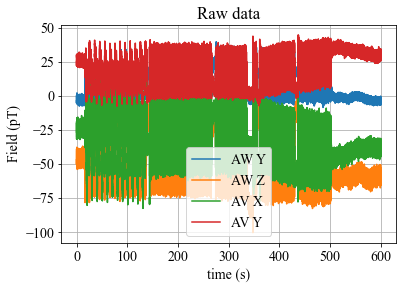

In [7]:
plt.plot(Exp2_time,Exp2_AW_Y,label='AW Y')
plt.plot(Exp2_time,Exp2_AW_Z,label='AW Z')
plt.plot(Exp2_time,Exp2_AV_X,label='AV X')
plt.plot(Exp2_time,Exp2_AV_Y,label='AV Y')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Field (pT)')
plt.legend(loc='lower center')
plt.title('Raw data')

if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_original_data_raw.png',bbox_inches='tight',dpi = dpiN)

### Times used for deciding various frequencies ###

In [8]:
# Short times (~4-5 cycles)
Exp2_theta_loc = [ 0,15,325,135,90]
Exp2_Freq       = [ 0.1, 0.5,  1,  3,    5]
Exp2_Start_Time = [ 40, 190, 310,390,  475]
Exp2_Stop_Time  = [ 81, 199, 315,391.4, 475.9] 

ind_freq_analysis = Exp2_Freq.index(freq_for_noise_analysis)
Exp2_theta_loc.append(0)
Exp2_Freq.append(0)
Exp2_Start_Time.append(580)
Exp2_Stop_Time.append(580 + Exp2_Stop_Time[ind_freq_analysis] - Exp2_Start_Time[ind_freq_analysis])

# Intermediate times (~8-10 cycles)
# Exp2_loc = [0,15,325,135,90]
# Exp2_Freq       = [0.1, 0.5,  1,  3,   5]
# Exp2_Start_Time = [ 40, 190, 310,390, 475]
# Exp2_Stop_Time  = [ 120,206, 318,392.7, 476.7]
# SavePlotDir_Exp2 = '../PythonFigs/FitFigs/Intermediate/Exp2/'

# long times
# Exp2_loc = [0,5,305,110,330]
# Exp2_Freq       = [0.1,0.5,  1,  3,  5]
# Exp2_Start_Time = [ 30,170,285,380,450]
# Exp2_Stop_Time  = [ 130,240,325,420,500]
# SavePlotDir_Exp2 = '../PythonFigs/FitFigs/Long/Exp2/'


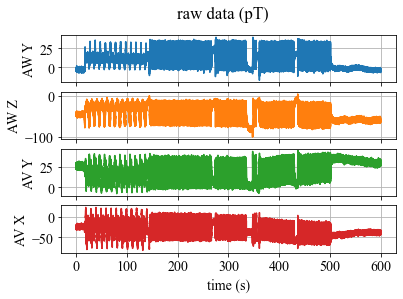

In [9]:

fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_time,Exp2_AW_Y,color = "C0")
splist[0].set_ylabel('AW Y')
splist[1].plot(Exp2_time,Exp2_AW_Z,color = "C1")
splist[1].set_ylabel('AW Z')
splist[2].plot(Exp2_time,Exp2_AV_Y,color="C2")
splist[2].set_ylabel('AV Y')
splist[3].plot(Exp2_time,Exp2_AV_X,color="C3")
splist[3].set_ylabel('AV X')
splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()


plt.xlabel('time (s)')
# plt.ylabel('Field (pT)')
# plt.legend()
plt.suptitle('raw data (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_original_data_raw_separate_subplots.png',bbox_inches='tight',dpi = dpiN)

### Plot original data with time cut imposed ###

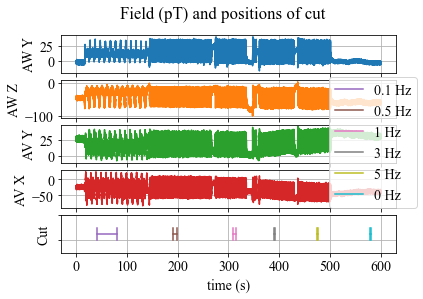

In [10]:
fig, splist = plt.subplots(nrows=5,ncols=1,sharex=True)

splist[0].plot(Exp2_time,Exp2_AW_Y,color = "C0")
splist[0].set_ylabel('AW Y')
splist[1].plot(Exp2_time,Exp2_AW_Z,color = "C1")
splist[1].set_ylabel('AW Z')
splist[2].plot(Exp2_time,Exp2_AV_Y,color="C2")
splist[2].set_ylabel('AV Y')
splist[3].plot(Exp2_time,Exp2_AV_X,color="C3")
splist[3].set_ylabel('AV X')
splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()


plt.xlabel('time (s)')
ylow = 0
yhigh = 1
ymid=0.5*(ylow+yhigh)
# col=['red','green','magenta']
icol = 4
for i_freq in range(len(Exp2_Freq)):
    start = Exp2_Start_Time[i_freq]
    stop = Exp2_Stop_Time[i_freq]
    h = splist[4].plot([start,start],[ylow,yhigh],color = "C{}".format(icol))
    splist[4].plot([start,stop],[ymid,ymid],color=h[0].get_color())
    splist[4].plot([stop,stop],[ylow,yhigh],color=h[0].get_color(),label='{} Hz'.format(Exp2_Freq[i_freq]))
    icol+=1
splist[4].set_ylim(-1,2)
splist[4].set_yticklabels([])
splist[4].grid()
splist[4].set_ylabel('Cut')
plt.legend(loc=[.8,1.2])
# plt.xlim(168,350)
# plt.ylim(-40,120)
plt.suptitle('Field (pT) and positions of cut')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_original_data_cut_place_old.png',bbox_inches='tight',dpi = dpiN)

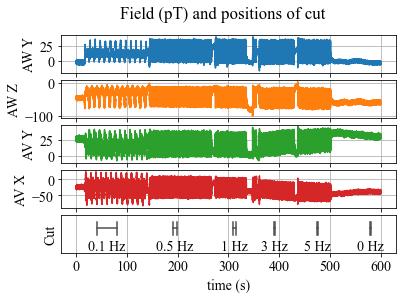

In [11]:
fig, splist = plt.subplots(nrows=5,ncols=1,sharex=True)

splist[0].plot(Exp2_time,Exp2_AW_Y,color = "C0")
splist[0].set_ylabel('AW Y')
splist[1].plot(Exp2_time,Exp2_AW_Z,color = "C1")
splist[1].set_ylabel('AW Z')
splist[2].plot(Exp2_time,Exp2_AV_Y,color="C2")
splist[2].set_ylabel('AV Y')
splist[3].plot(Exp2_time,Exp2_AV_X,color="C3")
splist[3].set_ylabel('AV X')
splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()


plt.xlabel('time (s)')
ylow = 0
yhigh = 1
ymid=0.5*(ylow+yhigh)
# col=['red','green','magenta']
icol = 4
for i_freq in range(len(Exp2_Freq)):
    start = Exp2_Start_Time[i_freq]
    stop = Exp2_Stop_Time[i_freq]
    freqtext = '{} Hz'.format(Exp2_Freq[i_freq])
    h = splist[4].plot([start,start],[ylow,yhigh]
    # ,color = "C{}".format(icol)
    ,color = [0.3,0.3,0.3]
    )
    splist[4].plot([start,stop],[ymid,ymid],color=h[0].get_color())
    splist[4].plot([stop,stop],[ylow,yhigh],color=h[0].get_color(),label=freqtext)
    plt.text((start+stop)/2,ylow-0.3,freqtext,ha='center',va='top')
    icol+=1
splist[4].set_ylim(-1.3,1.5)
splist[4].set_yticklabels([])
splist[4].set_yticks([])
splist[4].grid()
splist[4].set_ylabel('Cut')
# plt.legend(ncol=len(Exp2_Freq),mode = "expand",
#            loc="lower center",fontsize=10)
# plt.xlim(168,350)
# plt.ylim(-40,120)
plt.suptitle('Field (pT) and positions of cut')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_original_data_cut_place.png',bbox_inches='tight',dpi = dpiN)

 ### Error measured by taking data without rotation (0 Hz) ###

### Cut data ###

In [12]:
Exp2_data_cut = {}
Exp2_data_cut['theta']={}
Exp2_data_cut['theta wrap']={}
Exp2_data_cut['time']={}

Exp2_data_cut['AW']={}
Exp2_data_cut['AW']['Z']={}
Exp2_data_cut['AW']['Z wrap'] = {}
Exp2_data_cut['AW']['Y']={}
Exp2_data_cut['AW']['Y wrap'] = {}
Exp2_data_cut['AV']={}
Exp2_data_cut['AV']['X']={}
Exp2_data_cut['AV']['Y']={}
Exp2_data_cut['AV']['Y wrap']={}
Exp2_data_cut['AV']['X wrap']={}

In [13]:
last_time = 0
for i_freq in range(len(Exp2_Freq)):
    freq = Exp2_Freq[i_freq]
    Exp2_data_cut['AW']['Z'][freq] = {}
    Exp2_data_cut['AW']['Y'][freq] = {}
    Exp2_data_cut['AV']['X'][freq] = {}
    Exp2_data_cut['AV']['Y'][freq] = {}
    Exp2_data_cut['AW']['Z wrap'][freq]    = {}
    Exp2_data_cut['AW']['Y wrap'][freq]    = {}
    Exp2_data_cut['AV']['X wrap'][freq]    = {}
    Exp2_data_cut['AV']['Y wrap'][freq]    = {}
    if freq==0:
        f_new_sample = sampling_factor * freq_for_noise_analysis
    else:
        f_new_sample = sampling_factor * freq
    n_skips = int(np.ceil(f_sample/f_new_sample))
    cutbool = (Exp2_time>Exp2_Start_Time[i_freq]) & (Exp2_time<Exp2_Stop_Time[i_freq])
    Time_i = Exp2_time[cutbool] - Exp2_Start_Time[i_freq] # reset all clocks to zero
    if freq ==0:
        Theta_i = 360 * freq_for_noise_analysis * Time_i
    else:
        Theta_i = 360 * freq * Time_i # degrees
    AWZ_i = Exp2_AW_Z[cutbool]
    AWY_i = Exp2_AW_Y[cutbool]
    AVX_i = Exp2_AV_X[cutbool]
    AVY_i = Exp2_AV_Y[cutbool]
    
    new_indices = np.arange(0,len(Time_i),n_skips)
    Theta_unwrap = Theta_i[new_indices]  - Exp2_theta_loc[i_freq]
    Theta_wrap = (Theta_unwrap) % (360) 
    Exp2_data_cut['theta'][freq] = Theta_unwrap
    Exp2_data_cut['time'][freq]  = Time_i[new_indices] + last_time
    last_time = max(Exp2_data_cut['time'][freq])
    Exp2_data_cut['AW']['Z'][freq]['B']     = AWZ_i[new_indices]
    Exp2_data_cut['AW']['Y'][freq]['B']     = AWY_i[new_indices]
    Exp2_data_cut['AV']['X'][freq]['B']     = AVX_i[new_indices]
    Exp2_data_cut['AV']['Y'][freq]['B']     = AVY_i[new_indices]
    sort_idx = Theta_wrap.argsort()
    Exp2_data_cut['theta wrap'][freq] = Theta_wrap[sort_idx]
    Exp2_data_cut['AW']['Z wrap'][freq]['B']    = Exp2_data_cut['AW']['Z'][freq]['B'][sort_idx]
    Exp2_data_cut['AW']['Y wrap'][freq]['B']    = Exp2_data_cut['AW']['Y'][freq]['B'][sort_idx]
    Exp2_data_cut['AV']['X wrap'][freq]['B']    = Exp2_data_cut['AV']['X'][freq]['B'][sort_idx]
    Exp2_data_cut['AV']['Y wrap'][freq]['B']    = Exp2_data_cut['AV']['Y'][freq]['B'][sort_idx]


(-2.0, 11.0)

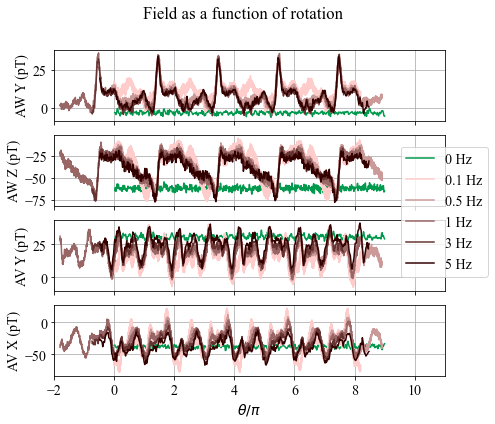

In [14]:
fig,[sp1,sp2,sp3,sp4]=plt.subplots(nrows=4,ncols=1,sharex=True,figsize = (7,6))
fig.suptitle('Field as a function of rotation')

plot_freq = [0,0.1,0.5,1,3,5]
i_freq = 0
if 0 in plot_freq:
    ncol = len(plot_freq)-1
else:
    ncol = len(plot_freq)
alph=1# - i_freq/10
for freq in plot_freq:
    if freq ==0:
        c = [0,.6,0.3]
    else:
        if dark_plots:
            # cval = 0.8-(ncol-1-i_freq)/ncol
            # c = [cval+0.2,cval,cval,alph]
            cval = 0.8-i_freq/ncol
            c = [cval+0.2,cval,cval,alph]
        else:
            cval = 0.8-i_freq/ncol
            c = [cval+0.2,cval,cval,alph]
        i_freq +=1
#     print(c)
    sp1.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Y'][freq]['B'],label='{} Hz'.format(freq),color = c)
    sp2.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Z'][freq]['B'],color = c)
    sp3.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['Y'][freq]['B'],color = c)
    sp4.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['X'][freq]['B'],color = c)
sp1.set_ylabel('AW Y (pT)')
sp2.set_ylabel('AW Z (pT)')
sp3.set_ylabel('AV Y (pT)')
sp4.set_ylabel('AV X (pT)')
sp4.set_xlabel('$\\theta/\pi$')
sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
fig.legend(loc='center right')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_with_0Hz.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,2)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom_with_0Hz.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,4)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom_2_with_0Hz.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,6)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom_3_with_0Hz.png',bbox_inches='tight',dpi = dpiN)

sp1.set_xlim(-2,11)


(-2.0, 11.0)

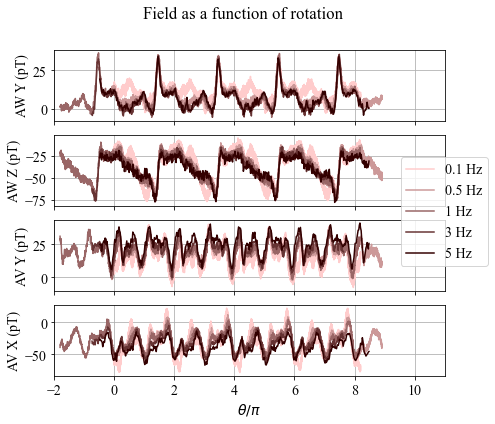

In [15]:
fig,[sp1,sp2,sp3,sp4]=plt.subplots(nrows=4,ncols=1,sharex=True,figsize = (7,6))
fig.suptitle('Field as a function of rotation')

plot_freq = [0.1,0.5,1,3,5]
i_freq = 0
if 0 in plot_freq:
    ncol = len(plot_freq)-1
else:
    ncol = len(plot_freq)
alph = 1# - i_freq/10
for freq in plot_freq:
    if freq ==0:
        c = [0,.6,0.3]
    else:
        cval = 0.8-i_freq/ncol
        c = [cval+0.2,cval,cval,alph]
        i_freq +=1
#     print(c)
    sp1.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Y'][freq]['B'],label='{} Hz'.format(freq),color = c)
    sp2.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Z'][freq]['B'],color = c)
    sp3.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['Y'][freq]['B'],color = c)
    sp4.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['X'][freq]['B'],color = c)
sp1.set_ylabel('AW Y (pT)')
sp2.set_ylabel('AW Z (pT)')
sp3.set_ylabel('AV Y (pT)')
sp4.set_ylabel('AV X (pT)')
sp4.set_xlabel('$\\theta/\pi$')
sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
fig.legend(loc='center right')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,2)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,4)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom_2.png',bbox_inches='tight',dpi = dpiN)
    sp1.set_xlim(0,6)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_zoom_3.png',bbox_inches='tight',dpi = dpiN)

sp1.set_xlim(-2,11)


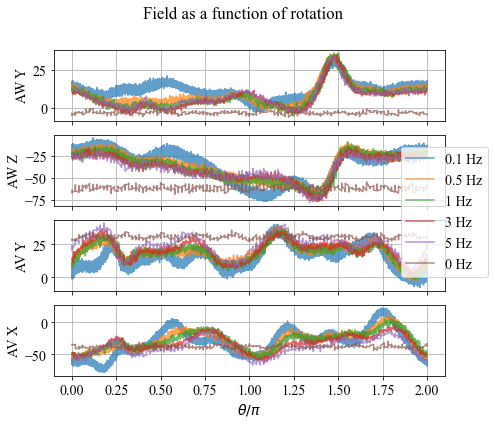

In [16]:
fig,[sp1,sp2,sp3,sp4]=plt.subplots(nrows=4,ncols=1,sharex=True,figsize = (7,6))
fig.suptitle('Field as a function of rotation')

for freq in Exp2_Freq:
    sp1.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AW']['Y wrap'][freq]['B'],label='{} Hz'.format(freq),
             alpha = 0.7)
    sp2.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AW']['Z wrap'][freq]['B'],
             alpha = 0.7)
    sp3.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AV']['Y wrap'][freq]['B'],
             alpha = 0.7)
    sp4.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AV']['X wrap'][freq]['B'],
             alpha = 0.7)
sp1.set_ylabel('AW Y')
sp2.set_ylabel('AW Z')
sp3.set_ylabel('AV Y')
sp4.set_ylabel('AV X')
sp4.set_xlabel('$\\theta/\pi$')
sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
fig.legend(loc='center right')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_theta_wrap.png',bbox_inches='tight',dpi = dpiN)

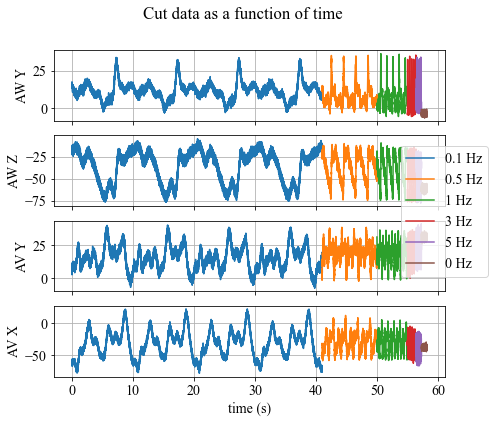

In [17]:
fig,[sp1,sp2,sp3,sp4]=plt.subplots(nrows=4,ncols=1,sharex=True,figsize=(7,6))
for freq in Exp2_Freq:
    sp1.plot(Exp2_data_cut['time'][freq],Exp2_data_cut['AW']['Y'][freq]['B'],label='{} Hz'.format(freq))
    sp2.plot(Exp2_data_cut['time'][freq],Exp2_data_cut['AW']['Z'][freq]['B'])
    sp3.plot(Exp2_data_cut['time'][freq],Exp2_data_cut['AV']['Y'][freq]['B'])
    sp4.plot(Exp2_data_cut['time'][freq],Exp2_data_cut['AV']['X'][freq]['B'])

sp1.set_ylabel('AW Y')
sp2.set_ylabel('AW Z')
sp3.set_ylabel('AV Y')
sp4.set_ylabel('AV X')
sp4.set_xlabel('time (s)')
sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
fig.legend(loc='center right')
plt.suptitle('Cut data as a function of time')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_time.png',bbox_inches='tight',dpi = dpiN)
#     sp1.set_xlim(59,85)
#     plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_time_zoom.png',bbox_inches='tight',dpi = dpiN)



# Error Analysis #

 ### Error measured by taking data without rotation (0 Hz) ###

## Standard deviation of cut data  ##

In [18]:
Exp2_data_cut['AW']['Y'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AW']['Y'][0]['B'])
Exp2_data_cut['AW']['Z'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AW']['Z'][0]['B'])
Exp2_data_cut['AV']['Y'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AV']['Y'][0]['B'])
Exp2_data_cut['AV']['X'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AV']['X'][0]['B'])


## Plot cut data and its standard deviation as a function of time 

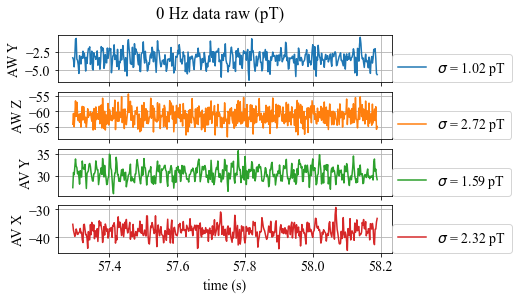

In [19]:
fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_data_cut['time'][0],Exp2_data_cut['AW']['Y'][0]['B'],color = "C0"
,label = '$\sigma$ = {:.2f} pT'.format(Exp2_data_cut['AW']['Y'][freq_for_noise_analysis]['sigma'])) 
splist[0].set_ylabel('AW Y')

splist[1].plot(Exp2_data_cut['time'][0],Exp2_data_cut['AW']['Z'][0]['B'],color = "C1"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AW']['Z'][freq_for_noise_analysis]['sigma']))) 
splist[1].set_ylabel('AW Z')

splist[2].plot(Exp2_data_cut['time'][0],Exp2_data_cut['AV']['Y'][0]['B'],color = "C2"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['Y'][freq_for_noise_analysis]['sigma'])))
splist[2].set_ylabel('AV Y')

splist[3].plot(Exp2_data_cut['time'][0],Exp2_data_cut['AV']['X'][0]['B'],color = "C3"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['X'][freq_for_noise_analysis]['sigma'])))
splist[3].set_ylabel('AV X')

splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()
splist[0].legend(loc = [1,0])
splist[1].legend(loc = [1,0])
splist[2].legend(loc = [1,0])
splist[3].legend(loc = [1,0])


plt.xlabel('time (s)')
# plt.ylabel('Field (pT)')

plt.suptitle('0 Hz data raw (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_noise_raw_data.png',bbox_inches='tight',dpi = dpiN)


## Plot cut data and its standard deviation as a function of theta

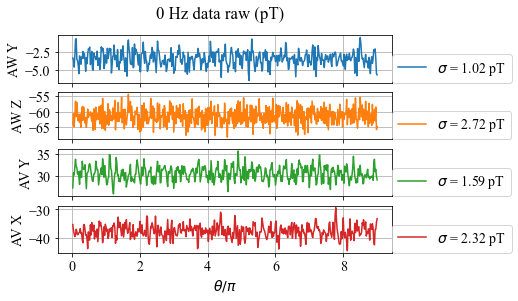

In [20]:
fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_data_cut['theta'][0]/180,Exp2_data_cut['AW']['Y'][0]['B'],color = "C0"
,label = '$\sigma$ = {:.2f} pT'.format(Exp2_data_cut['AW']['Y'][freq_for_noise_analysis]['sigma'])) 
splist[0].set_ylabel('AW Y')

splist[1].plot(Exp2_data_cut['theta'][0]/180,Exp2_data_cut['AW']['Z'][0]['B'],color = "C1"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AW']['Z'][freq_for_noise_analysis]['sigma']))) 
splist[1].set_ylabel('AW Z')

splist[2].plot(Exp2_data_cut['theta'][0]/180,Exp2_data_cut['AV']['Y'][0]['B'],color = "C2"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['Y'][freq_for_noise_analysis]['sigma'])))
splist[2].set_ylabel('AV Y')

splist[3].plot(Exp2_data_cut['theta'][0]/180,Exp2_data_cut['AV']['X'][0]['B'],color = "C3"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['X'][freq_for_noise_analysis]['sigma'])))
splist[3].set_ylabel('AV X')

splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()
splist[0].legend(loc = [1,0])
splist[1].legend(loc = [1,0])
splist[2].legend(loc = [1,0])
splist[3].legend(loc = [1,0])



plt.xlabel('$\\theta/\pi$')
# plt.ylabel('Field (pT)')

plt.suptitle('0 Hz data raw (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_noise_raw_data_theta.png',bbox_inches='tight',dpi = dpiN)


## Cut data and its standard deviation as a function of theta (wrapped) ##

In [21]:
Exp2_data_cut['AW']['Y wrap'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AW']['Y wrap'][0]['B'])
Exp2_data_cut['AW']['Z wrap'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AW']['Z wrap'][0]['B'])
Exp2_data_cut['AV']['Y wrap'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AV']['Y wrap'][0]['B'])
Exp2_data_cut['AV']['X wrap'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut['AV']['X wrap'][0]['B'])


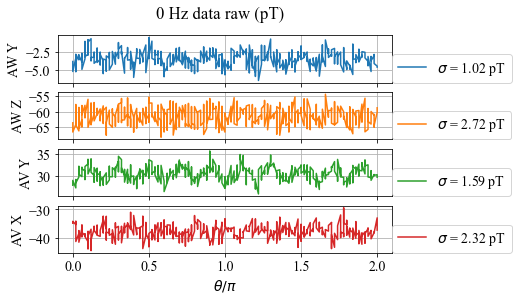

In [22]:
fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_data_cut['theta wrap'][0]/180,Exp2_data_cut['AW']['Y wrap'][0]['B'],color = "C0"
,label = '$\sigma$ = {:.2f} pT'.format(Exp2_data_cut['AW']['Y wrap'][freq_for_noise_analysis]['sigma'])) 
splist[0].set_ylabel('AW Y')

splist[1].plot(Exp2_data_cut['theta wrap'][0]/180,Exp2_data_cut['AW']['Z wrap'][0]['B'],color = "C1"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AW']['Z wrap'][freq_for_noise_analysis]['sigma']))) 
splist[1].set_ylabel('AW Z')

splist[2].plot(Exp2_data_cut['theta wrap'][0]/180,Exp2_data_cut['AV']['Y wrap'][0]['B'],color = "C2"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['Y wrap'][freq_for_noise_analysis]['sigma'])))
splist[2].set_ylabel('AV Y')

splist[3].plot(Exp2_data_cut['theta wrap'][0]/180,Exp2_data_cut['AV']['X wrap'][0]['B'],color = "C3"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut['AV']['X wrap'][freq_for_noise_analysis]['sigma'])))
splist[3].set_ylabel('AV X')

splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()
splist[0].legend(loc = [1,0])
splist[1].legend(loc = [1,0])
splist[2].legend(loc = [1,0])
splist[3].legend(loc = [1,0])



plt.xlabel('$\\theta/\pi$')
# plt.ylabel('Field (pT)')

plt.suptitle('0 Hz data raw (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_noise_raw_data_theta_wrap.png',bbox_inches='tight',dpi = dpiN)


## Standard deviation over one cycle without averaging ##

In [23]:
idx_2pi = np.argmin(np.abs(Exp2_data_cut['theta'][0] - 360))
idx_0pi = np.argmin(np.abs(Exp2_data_cut['theta'][0] - 0))

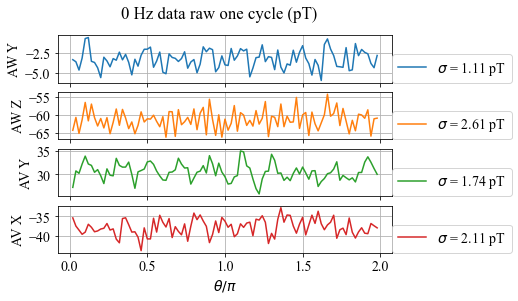

In [24]:
fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_data_cut['theta'][0][idx_0pi:idx_2pi]/180,Exp2_data_cut['AW']['Y'][0]['B'][idx_0pi:idx_2pi]
,color = "C0",label = '$\sigma$ = {:.2f} pT'.format(np.std(Exp2_data_cut['AW']['Y'][0]['B'][idx_0pi:idx_2pi]))) 
splist[0].set_ylabel('AW Y')

splist[1].plot(Exp2_data_cut['theta'][0][idx_0pi:idx_2pi]/180,Exp2_data_cut['AW']['Z'][0]['B'][idx_0pi:idx_2pi]
,color = "C1",label = '$\sigma$ = {:.2f} pT'.format(np.std(Exp2_data_cut['AW']['Z'][0]['B'][idx_0pi:idx_2pi]))) 
splist[1].set_ylabel('AW Z')

splist[2].plot(Exp2_data_cut['theta'][0][idx_0pi:idx_2pi]/180,Exp2_data_cut['AV']['Y'][0]['B'][idx_0pi:idx_2pi]
,color = "C2",label = '$\sigma$ = {:.2f} pT'.format(np.std(Exp2_data_cut['AV']['Y'][0]['B'][idx_0pi:idx_2pi])))
splist[2].set_ylabel('AV Y')

splist[3].plot(Exp2_data_cut['theta'][0][idx_0pi:idx_2pi]/180,Exp2_data_cut['AV']['X'][0]['B'][idx_0pi:idx_2pi]
,color = "C3",label = '$\sigma$ = {:.2f} pT'.format(np.std(Exp2_data_cut['AV']['X'][0]['B'][idx_0pi:idx_2pi])))
splist[3].set_ylabel('AV X')

splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()
splist[0].legend(loc = [1,0])
splist[1].legend(loc = [1,0])
splist[2].legend(loc = [1,0])
splist[3].legend(loc = [1,0])


plt.xlabel('$\\theta/\pi$')
# plt.ylabel('Field (pT)')

plt.suptitle('0 Hz data raw one cycle (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_noise_raw_data_theta_cut_noavg.png',bbox_inches='tight',dpi = dpiN)




## Save to file

In [25]:
if SaveData:
    with open(SaveDataDir_Exp2+'Exp2_cut_data_with_error.pk','wb') as file_obj:
        pickle.dump(Exp2_data_cut,file_obj,protocol=pickle.HIGHEST_PROTOCOL)

# Average

In [26]:
Exp2_data_cut_avg = {}
Exp2_data_cut_avg['AW'] = {}
Exp2_data_cut_avg['AV'] = {}


In [27]:
# Now let's try to average

# Since we have timestamps and we know the frequency, we can call a new segment every time we hit 1/freq

# nu = 5
# last_start_time = Exp1_data_cut['time'][nu][0]
Exp2_data_cut_avg['AW']['Z avg']={}
Exp2_data_cut_avg['AW']['Y avg']={}
Exp2_data_cut_avg['AV']['X avg']={}
Exp2_data_cut_avg['AV']['Y avg']={}
Exp2_data_cut_avg['theta avg']={}

for nu in Exp2_Freq:
    if nu==0:
        n_one_period = int(f_sample/freq_for_noise_analysis)
    else:
        n_one_period = int(f_sample/nu)
    print("averaging at {} Hz".format(nu))
    print("Points expected in single cycle = {}".format(n_one_period))
    print("Total number of points = {}".format(len(Exp2_data_cut['time'][nu])))
    print("Points required for 4 cycles = {}".format(4*n_one_period))
    AW_Z_avg = 0
    AW_Y_avg = 0
    AV_X_avg = 0
    AV_Y_avg = 0
    i_total = 1
    i_segment = 0
    i_start = 0
    i_end = 0
    while i_total<len(Exp2_data_cut['time'][nu]):
        if i_total%n_one_period==0:
    #         print(Exp1_Time_cut[nu][i_total])
            i_end  = i_total-1
            if i_segment ==0:
    #             time   = Exp1_data_cut['time'][nu][i_start:i_end]
                theta  = Exp2_data_cut['theta'][nu][i_start:i_end]
                theta = theta# - theta[0]
            AW_Z_avg      +=  Exp2_data_cut['AW']['Z'][nu]['B'][i_start:i_end]
            AW_Y_avg      +=  Exp2_data_cut['AW']['Y'][nu]['B'][i_start:i_end]
            AV_X_avg      +=  Exp2_data_cut['AV']['X'][nu]['B'][i_start:i_end]
            AV_Y_avg      +=  Exp2_data_cut['AV']['Y'][nu]['B'][i_start:i_end]
            i_start = i_total
            i_segment+=1
        i_total+=1
    theta_wrap = theta%360
    sort_idx = theta_wrap.argsort()
    Exp2_data_cut_avg['theta avg'][nu] = theta_wrap[sort_idx] 
    Exp2_data_cut_avg['AW']['Z avg'][nu] = {}
    Exp2_data_cut_avg['AW']['Y avg'][nu] = {}
    Exp2_data_cut_avg['AV']['X avg'][nu] = {}
    Exp2_data_cut_avg['AV']['Y avg'][nu] = {}
    Exp2_data_cut_avg['AW']['Z avg'][nu]['B'] = AW_Z_avg[sort_idx]/i_segment
    Exp2_data_cut_avg['AW']['Y avg'][nu]['B'] = AW_Y_avg[sort_idx]/i_segment
    Exp2_data_cut_avg['AV']['X avg'][nu]['B'] = AV_X_avg[sort_idx]/i_segment
    Exp2_data_cut_avg['AV']['Y avg'][nu]['B'] = AV_Y_avg[sort_idx]/i_segment
    print("Number of averages at {} Hz is {}".format(nu,i_segment))




averaging at 0.1 Hz
Points expected in single cycle = 5000
Total number of points = 20499
Points required for 4 cycles = 20000
Number of averages at 0.1 Hz is 4
averaging at 0.5 Hz
Points expected in single cycle = 1000
Total number of points = 4499
Points required for 4 cycles = 4000
Number of averages at 0.5 Hz is 4
averaging at 1 Hz
Points expected in single cycle = 500
Total number of points = 2499
Points required for 4 cycles = 2000
Number of averages at 1 Hz is 4
averaging at 3 Hz
Points expected in single cycle = 166
Total number of points = 699
Points required for 4 cycles = 664
Number of averages at 3 Hz is 4
averaging at 5 Hz
Points expected in single cycle = 100
Total number of points = 449
Points required for 4 cycles = 400
Number of averages at 5 Hz is 4
averaging at 0 Hz
Points expected in single cycle = 100
Total number of points = 450
Points required for 4 cycles = 400
Number of averages at 0 Hz is 4


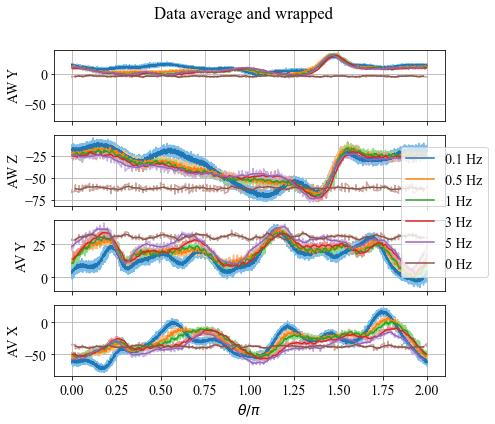

In [28]:
fig, [sp1,sp2,sp3,sp4] = plt.subplots(nrows=4,ncols=1,sharex=True,figsize=(7,6))

col = []
for freq in Exp2_Freq:
    h = sp1.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Z avg'][freq]['B'],visible=False)
    dark_col = h[0].get_color()
    col.append(dark_col)
    light_col = lighten_color(dark_col)
    sp1.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AW']['Y wrap'][freq]['B'],color = light_col,alpha=1)
    sp2.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AW']['Z wrap'][freq]['B'],color = light_col,alpha =1)
    sp3.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AV']['Y wrap'][freq]['B'],color = light_col,alpha=1)
    sp4.plot(Exp2_data_cut['theta wrap'][freq]/180,Exp2_data_cut['AV']['X wrap'][freq]['B'],color = light_col,markersize=1,alpha =1)
i_freq = 0
for freq in Exp2_Freq:
    dark_col = col[i_freq]
    sp1.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Y avg'][freq]['B'],label = '{} Hz'.format(freq)
            ,color = dark_col)
    sp2.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Z avg'][freq]['B'],
            color = dark_col)
    sp3.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AV']['Y avg'][freq]['B']
            ,color = dark_col)
    sp4.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AV']['X avg'][freq]['B'],
            color = dark_col)
    i_freq += 1
    
sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
# sp2.legend()
fig.legend(loc='center right')
sp1.set_ylabel('AW Y')
sp2.set_ylabel('AW Z')
sp3.set_ylabel('AV Y')
sp4.set_ylabel('AV X')
sp4.set_xlabel('$\\theta/\pi$')
plt.suptitle('Data average and wrapped')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_avg.png',bbox_inches='tight',dpi = dpiN)

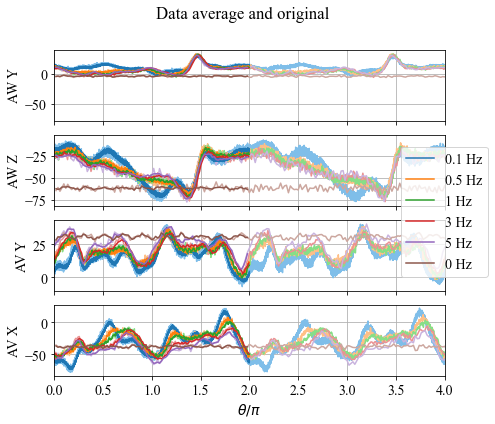

In [29]:
fig, [sp1,sp2,sp3,sp4] = plt.subplots(nrows=4,ncols=1,sharex=True,figsize=(7,6))

col = []
plot_freq = [.1,.5,1,3,5,0]
for freq in plot_freq:
    h = sp1.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Z avg'][freq]['B'],visible=False)
    dark_col = h[0].get_color()
    col.append(dark_col)
    light_col = lighten_color(dark_col)
    sp1.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Y'][freq]['B'],color = light_col)
    sp2.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AW']['Z'][freq]['B'],color = light_col)
    sp3.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['Y'][freq]['B'],color = light_col)
    sp4.plot(Exp2_data_cut['theta'][freq]/180,Exp2_data_cut['AV']['X'][freq]['B'],color = light_col)
i_freq = 0
for freq in plot_freq:
    dark_col = col[i_freq]
    sp1.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Y avg'][freq]['B'],label = '{} Hz'.format(freq)
            ,color = dark_col)
    sp2.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AW']['Z avg'][freq]['B'],
            color = dark_col)
    sp3.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AV']['Y avg'][freq]['B']
            ,color = dark_col)
    sp4.plot(Exp2_data_cut_avg['theta avg'][freq]/180,Exp2_data_cut_avg['AV']['X avg'][freq]['B'],
            color = dark_col)
    i_freq += 1

sp1.grid()
sp2.grid()
sp3.grid()
sp4.grid()
# sp2.legend()
fig.legend(loc='center right')
sp1.set_ylabel('AW Y')
sp2.set_ylabel('AW Z')
sp3.set_ylabel('AV Y')
sp4.set_ylabel('AV X')
sp4.set_xlabel('$\\theta/\pi$')
plt.suptitle('Data average and original')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_avg_compare_to_full_set.png',bbox_inches='tight',dpi = dpiN)
    plt.xlim(0,4)
    plt.savefig(SavePlotDir_Exp2+'Exp2_cut_data_avg_compare_to_1_set.png',bbox_inches='tight',dpi = dpiN)

## Standard deviation for data after averaging ##

In [30]:
Exp2_data_cut_avg['AW']['Y avg'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut_avg['AW']['Y avg'][0]['B'])
Exp2_data_cut_avg['AW']['Z avg'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut_avg['AW']['Z avg'][0]['B'])
Exp2_data_cut_avg['AV']['Y avg'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut_avg['AV']['Y avg'][0]['B'])
Exp2_data_cut_avg['AV']['X avg'][freq_for_noise_analysis]['sigma'] = np.std(Exp2_data_cut_avg['AV']['X avg'][0]['B'])


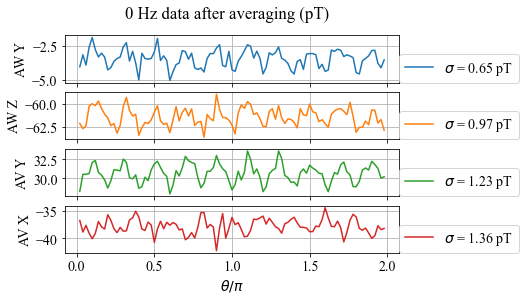

In [31]:
fig, splist = plt.subplots(nrows=4,ncols=1,sharex=True)

splist[0].plot(Exp2_data_cut_avg['theta avg'][0]/180,Exp2_data_cut_avg['AW']['Y avg'][0]['B'],color = "C0"
,label = '$\sigma$ = {:.2f} pT'.format(Exp2_data_cut_avg['AW']['Y avg'][freq_for_noise_analysis]['sigma'])) 
splist[0].set_ylabel('AW Y')

splist[1].plot(Exp2_data_cut_avg['theta avg'][0]/180,Exp2_data_cut_avg['AW']['Z avg'][0]['B'],color = "C1"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut_avg['AW']['Z avg'][freq_for_noise_analysis]['sigma']))) 
splist[1].set_ylabel('AW Z')

splist[2].plot(Exp2_data_cut_avg['theta avg'][0]/180,Exp2_data_cut_avg['AV']['Y avg'][0]['B'],color = "C2"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut_avg['AV']['Y avg'][freq_for_noise_analysis]['sigma'])))
splist[2].set_ylabel('AV Y')

splist[3].plot(Exp2_data_cut_avg['theta avg'][0]/180,Exp2_data_cut_avg['AV']['X avg'][0]['B'],color = "C3"
,label = '$\sigma$ = {:.2f} pT'.format((Exp2_data_cut_avg['AV']['X avg'][freq_for_noise_analysis]['sigma'])))
splist[3].set_ylabel('AV X')

splist[0].grid()
splist[1].grid()
splist[2].grid()
splist[3].grid()
splist[0].legend(loc = [1,0])
splist[1].legend(loc = [1,0])
splist[2].legend(loc = [1,0])
splist[3].legend(loc = [1,0])



plt.xlabel('$\\theta/\pi$')
# plt.ylabel('Field (pT)')

plt.suptitle('0 Hz data after averaging (pT)')
if SaveDataFigs:
    plt.savefig(SavePlotDir_Exp2+'Exp2_noise_raw_data_theta_avg.png',bbox_inches='tight',dpi = dpiN)


## Save to file

In [32]:
if SaveData:
    with open(SaveDataDir_Exp2+'Exp2_cut_averaged_data.pk','wb') as file_obj:
        pickle.dump(Exp2_data_cut_avg,file_obj,protocol=pickle.HIGHEST_PROTOCOL)